In [243]:
from brian2 import *
%matplotlib inline

# fn's defining the gradients given a certain tuple of values
def get_delta_v(vt, ut, I):
    return 0.04*vt**2+5.*vt+140.-ut+I

def get_delta_u(a, b, vt, ut):
    return a*(b*vt - ut)

In [282]:
def generate_plot_and_print_spike_num_for_b_value(b):
    # init. values
    v = -65; u = 0;
    # constants
    a = 0.0275;
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 200000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, 0)
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]


    # plotting
    tot_time = n_steps * dt
    n_bins = 10
    axline_step = tot_time / n_bins
    figure(figsize=(11, 6))
    for l in range(n_bins+1):
        axvline(l*axline_step, ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(timesteps, v_vals, '-', label='v')
    plot(timesteps, u_vals, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)')
    title('Plot for constant parametrisation, with b='+str(b));

    print("last v:", v)
    print("last u:", u)
    print("spike_count: ", spike_count)
    return spike_count

current b-value: 0.24
last v: -65.84428877024025
last u: -15.802629304851225
spike_count:  0
current b-value: 0.25
last v: -64.41391109270316
last u: -16.103477773170567
spike_count:  0
current b-value: 0.26
last v: -62.500005458364974
last u: -16.250000253263345
spike_count:  0
current b-value: 0.27
last v: -75.69394125929658
last u: -9.47623347969713
spike_count:  12
current b-value: 0.28
last v: -64.8738988931068
last u: -16.275611158807987
spike_count:  14
current b-value: 0.29000000000000004
last v: -53.912830011161944
last u: -16.804347362827357
spike_count:  16
current b-value: 0.30000000000000004
last v: -74.69234796567687
last u: -9.503433785255176
spike_count:  19
current b-value: 0.31000000000000005
last v: -73.89754695180683
last u: -9.502109509608687
spike_count:  21
current b-value: 0.32000000000000006
last v: -44.67130292530771
last u: -17.198837825119885
spike_count:  22
current b-value: 0.33000000000000007
last v: -60.586438119765646
last u: -17.192453230038485
spike_c

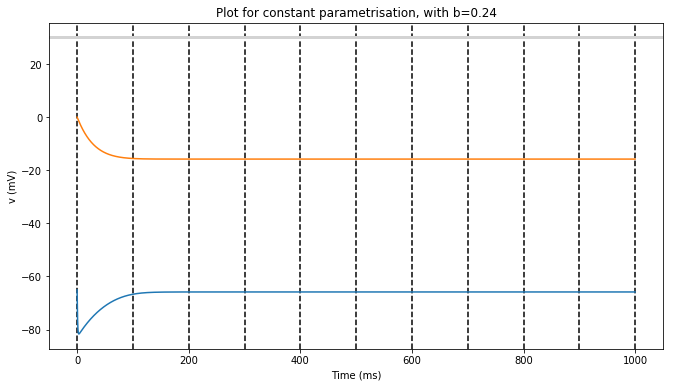

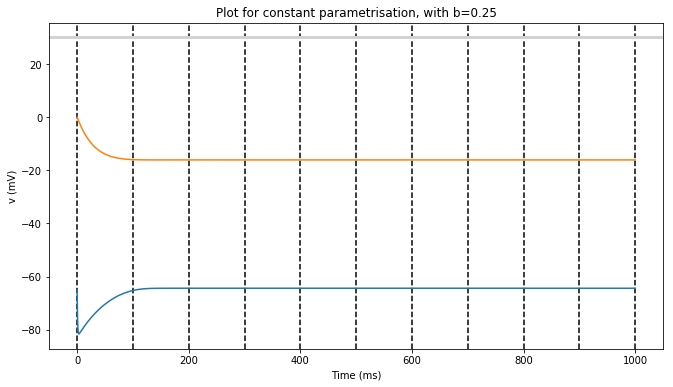

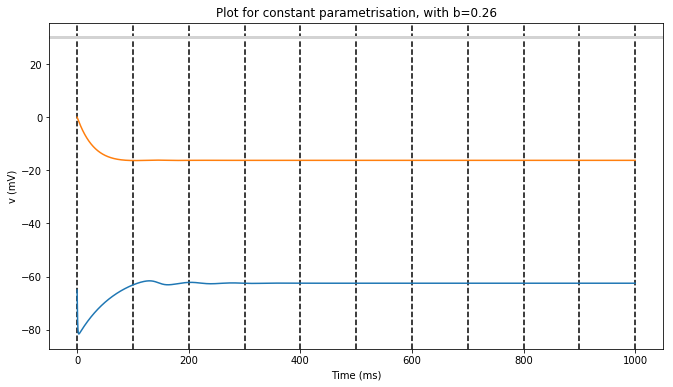

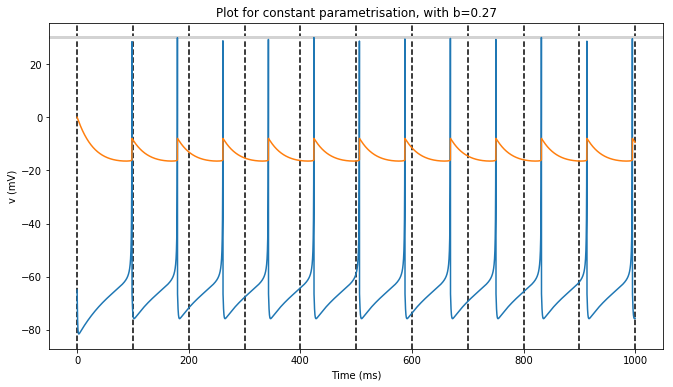

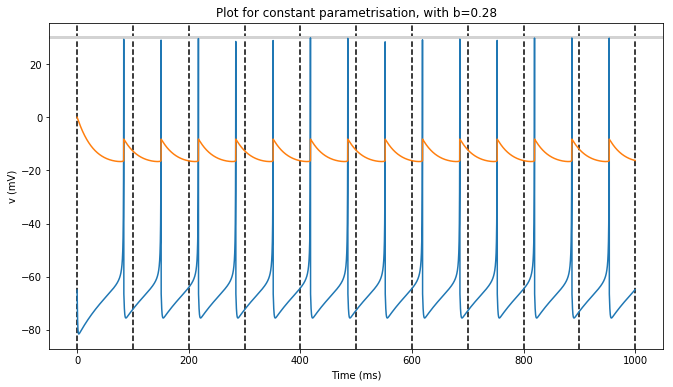

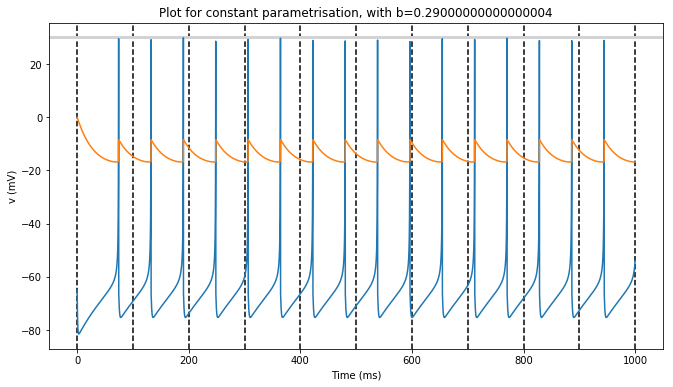

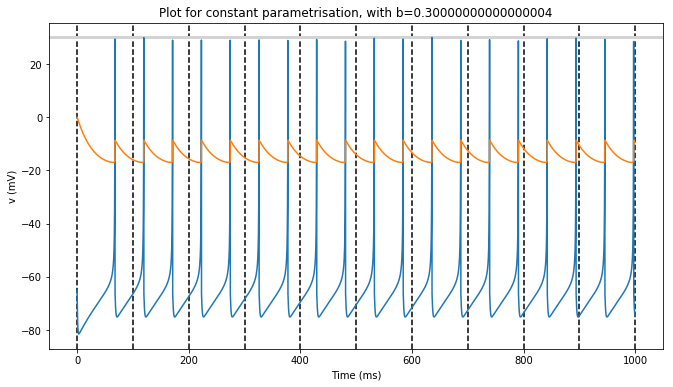

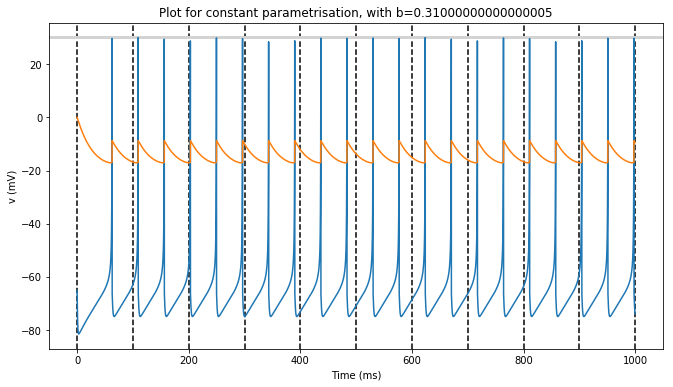

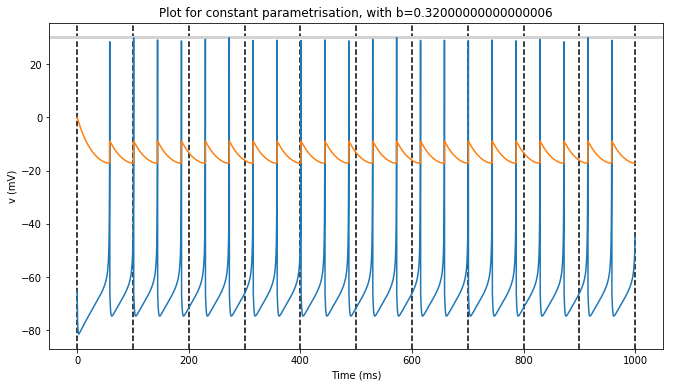

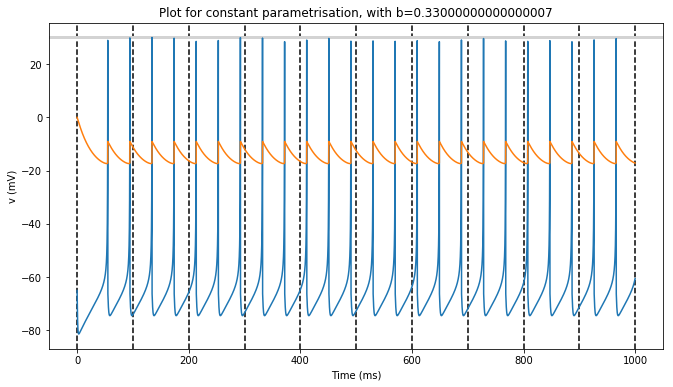

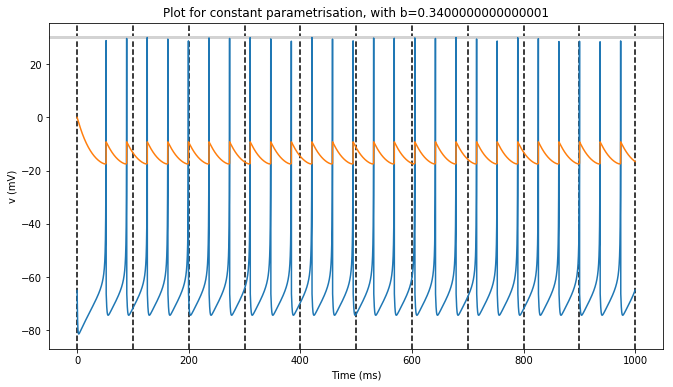

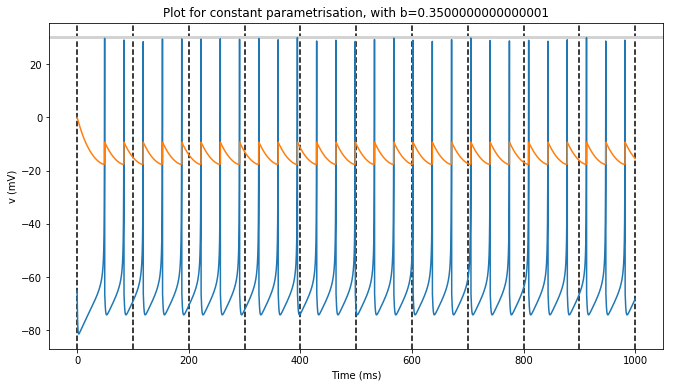

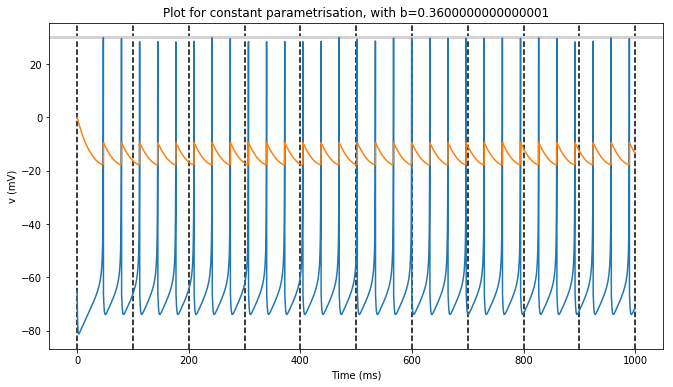

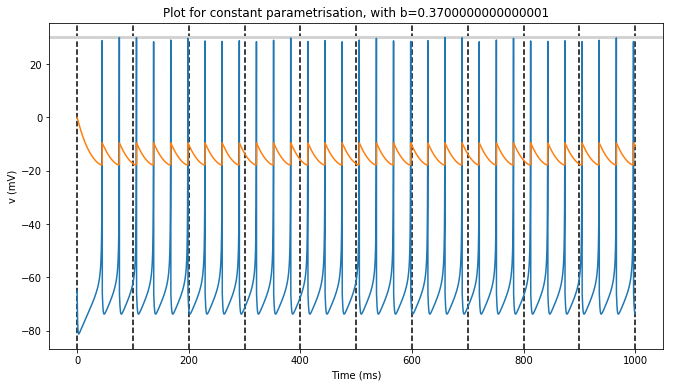

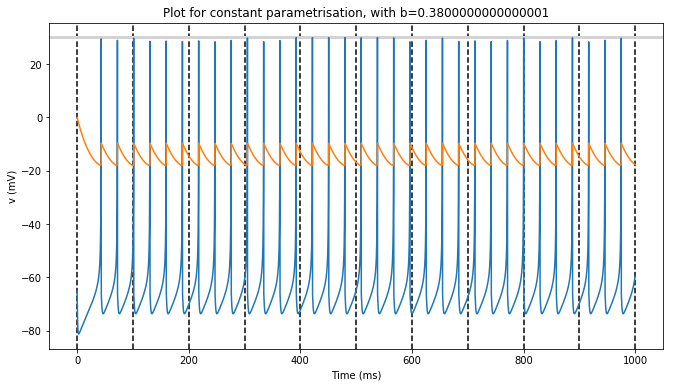

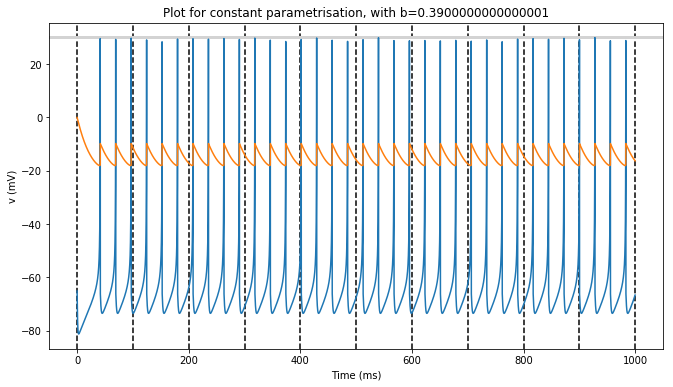

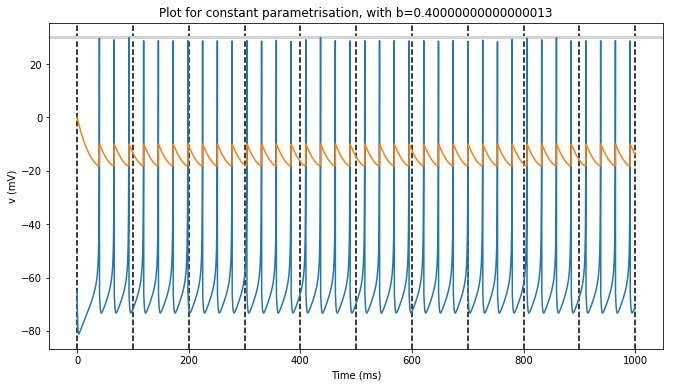

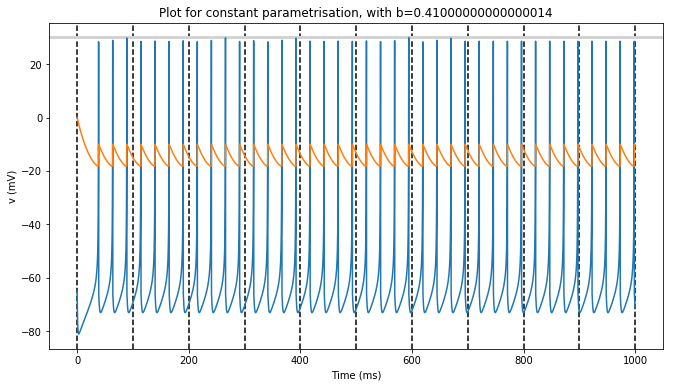

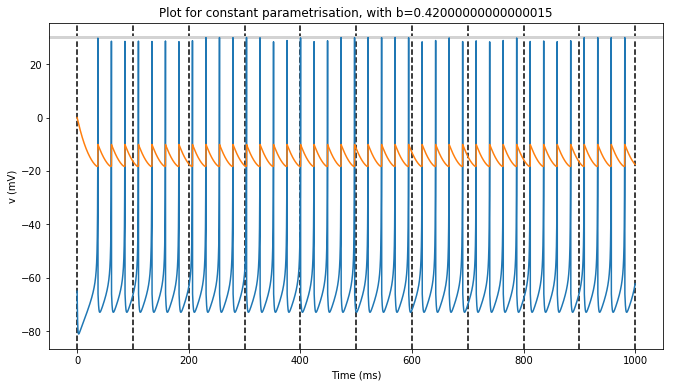

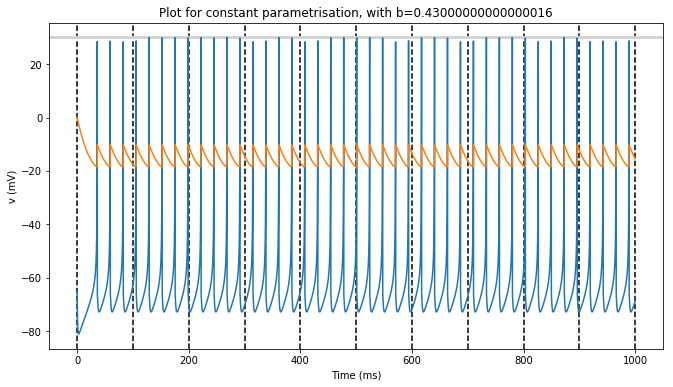

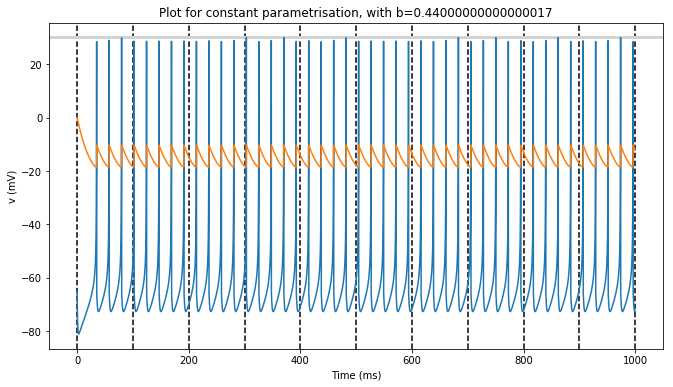

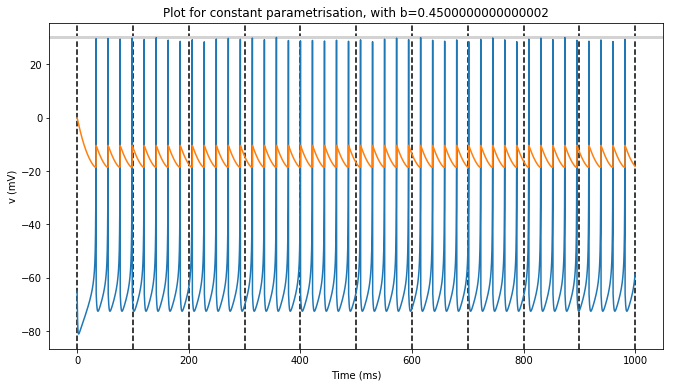

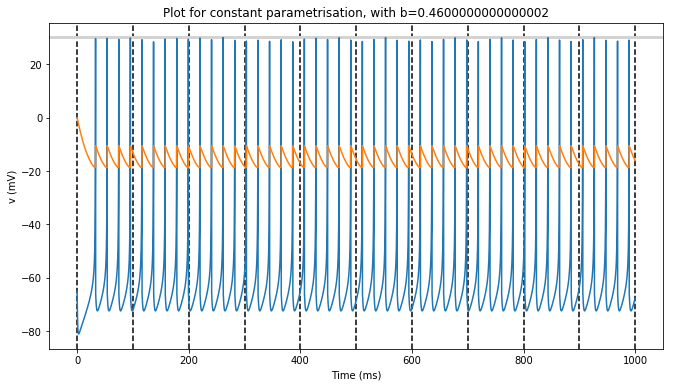

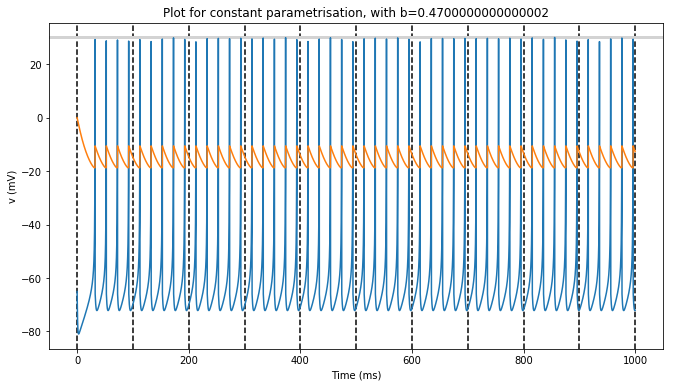

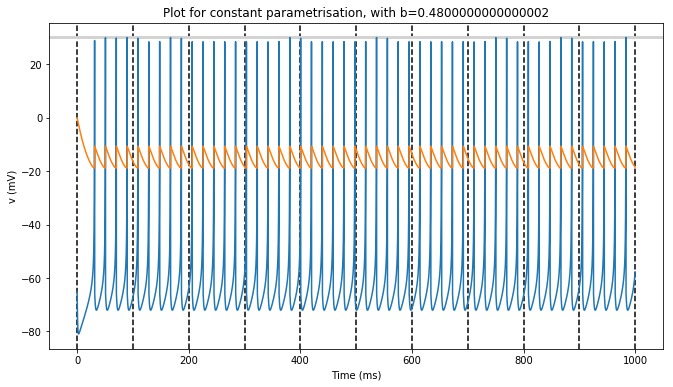

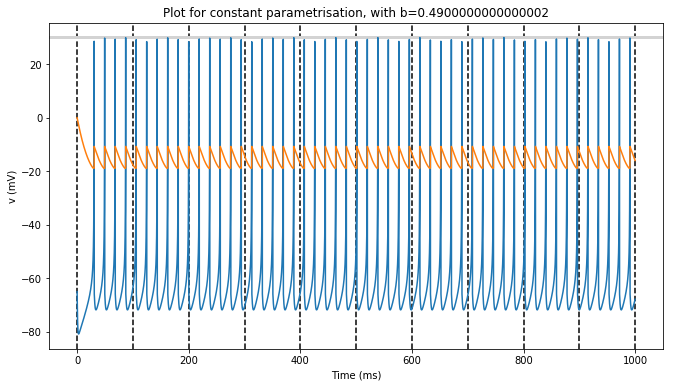

In [283]:
spike_counts = []
b = 0.24
delta_b = 0.01
for t in range(0, 26):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(b)]
    b += delta_b

In [228]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
